# Assignment 6 - Knock airport Weather
**Course:** Programming for Data Analytics  
**Lecture:** Module 6 : Timeseries and synthetic data 
**Author:** Clyde Watts
**Date:** 2025-11-05
**Assignment:** Knock airport Weather


__Knock airport Weather__
Create a notebook called assignment_6_Weather.ipynb

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)
You do not need to over comment your code. Marks will be given for how nice the plots are.

Last modified: Thursday, 30 October 2025, 9:11 AM
Blocks



__Import Modules__

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Coonfiguration Parameters__

In [4]:
csv_url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

##  Part 1 : Load Data 



#### Load and Extract CSV Header Metadata ###

This will show the column definitions

In [18]:
raw_head_data = pd.read_csv(csv_url,skiprows=5,nrows=17,header=None)
raw_head_data.reset_index(inplace=True)
raw_head_data

,index,0
0,0,date: - Date and Time (utc)
1,1,rain: - Precipitation Amount (mm)\t
2,2,temp: - Air Temperature (C)\t
3,3,wetb: - Wet Bulb Temperature (C)
4,4,dewpt: - Dew Point Temperature (C)
5,5,rhum: - Relative Humidity (%)
6,6,vappr: - Vapour Pressure (hPa)\t
7,7,msl: - Mean Sea Level Pressure (hPa)
8,8,wdsp: - Mean Wind Speed (knot)
9,9,wddir: - Predominant Wind Direction (degree)


### Load Data 

This will load the raw data , and transform where neccessary

In [26]:
# Load the dataset
raw_data = pd.read_csv(csv_url,skiprows=23)
# transforma the date column to datetime format
# the format is in 10-apr-2020 14:00 format
# d = DD, b = abbreviated month name, Y = YYYY H
# insert before date column (as the first column)
raw_data.insert(0, 'the_date', pd.to_datetime(raw_data['date'], format='%d-%b-%Y %H:%M'))
# change index to the_date
raw_data.set_index('the_date', inplace=True)
print("Raw Data Loaded")
print(f"Shape: {raw_data.shape}")
print(f"Columns: {raw_data.columns.tolist()}")
print(f"Info: {raw_data.info()}")
print(f"Head: {raw_data.head()}")

C:\Users\cw171001\AppData\Local\Temp\ipykernel_35624\3482160968.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(csv_url,skiprows=23)


Raw Data Loaded
Shape: (255690, 21)
Columns: ['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255690 entries, 1996-04-10 14:00:00 to 2025-10-01 00:00:00
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    255690 non-null  object 
 1   ind     255690 non-null  int64  
 2   rain    255690 non-null  object 
 3   ind.1   255690 non-null  int64  
 4   temp    255690 non-null  float64
 5   ind.2   255690 non-null  int64  
 6   wetb    255690 non-null  float64
 7   dewpt   255690 non-null  float64
 8   vappr   255690 non-null  float64
 9   rhum    255690 non-null  int64  
 10  msl     255690 non-null  object 
 11  ind.3   255690 non-null  int64  
 12  wdsp    255690 non-null  object 
 13  ind.4   255690 non-null  int64  
 14  wddir   255690 non-null  obje

## Part 2 : Plots ##

Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month  


60% of the marks will be given for the above


__Prepare Resampling Daily__

In [48]:
rs_mean_daily = raw_data['temp'].resample('D').mean().reset_index()
# fill missing values with forward fill
rs_mean_daily.fillna(method='ffill', inplace=True)
rs_mean_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10767 entries, 0 to 10766
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   the_date  10767 non-null  datetime64[ns]
 1   temp      10767 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 168.4 KB


C:\Users\cw171001\AppData\Local\Temp\ipykernel_35624\1536461798.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rs_mean_daily.fillna(method='ffill', inplace=True)


__Prepare Resampling Monthly__

In [49]:
rs_mean_monthly = raw_data['temp'].resample('M').mean().reset_index()
# fill missing values with forward fill
rs_mean_monthly.fillna(method='ffill', inplace=True)
rs_mean_monthly.head()

C:\Users\cw171001\AppData\Local\Temp\ipykernel_35624\447117580.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rs_mean_monthly = raw_data['temp'].resample('M').mean().reset_index()
C:\Users\cw171001\AppData\Local\Temp\ipykernel_35624\447117580.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rs_mean_monthly.fillna(method='ffill', inplace=True)


,the_date,temp
0,1996-04-30,11.500000
1,1996-05-31,11.500000
2,1996-06-30,11.500000
3,1996-07-31,12.650000
4,1996-08-31,12.946909


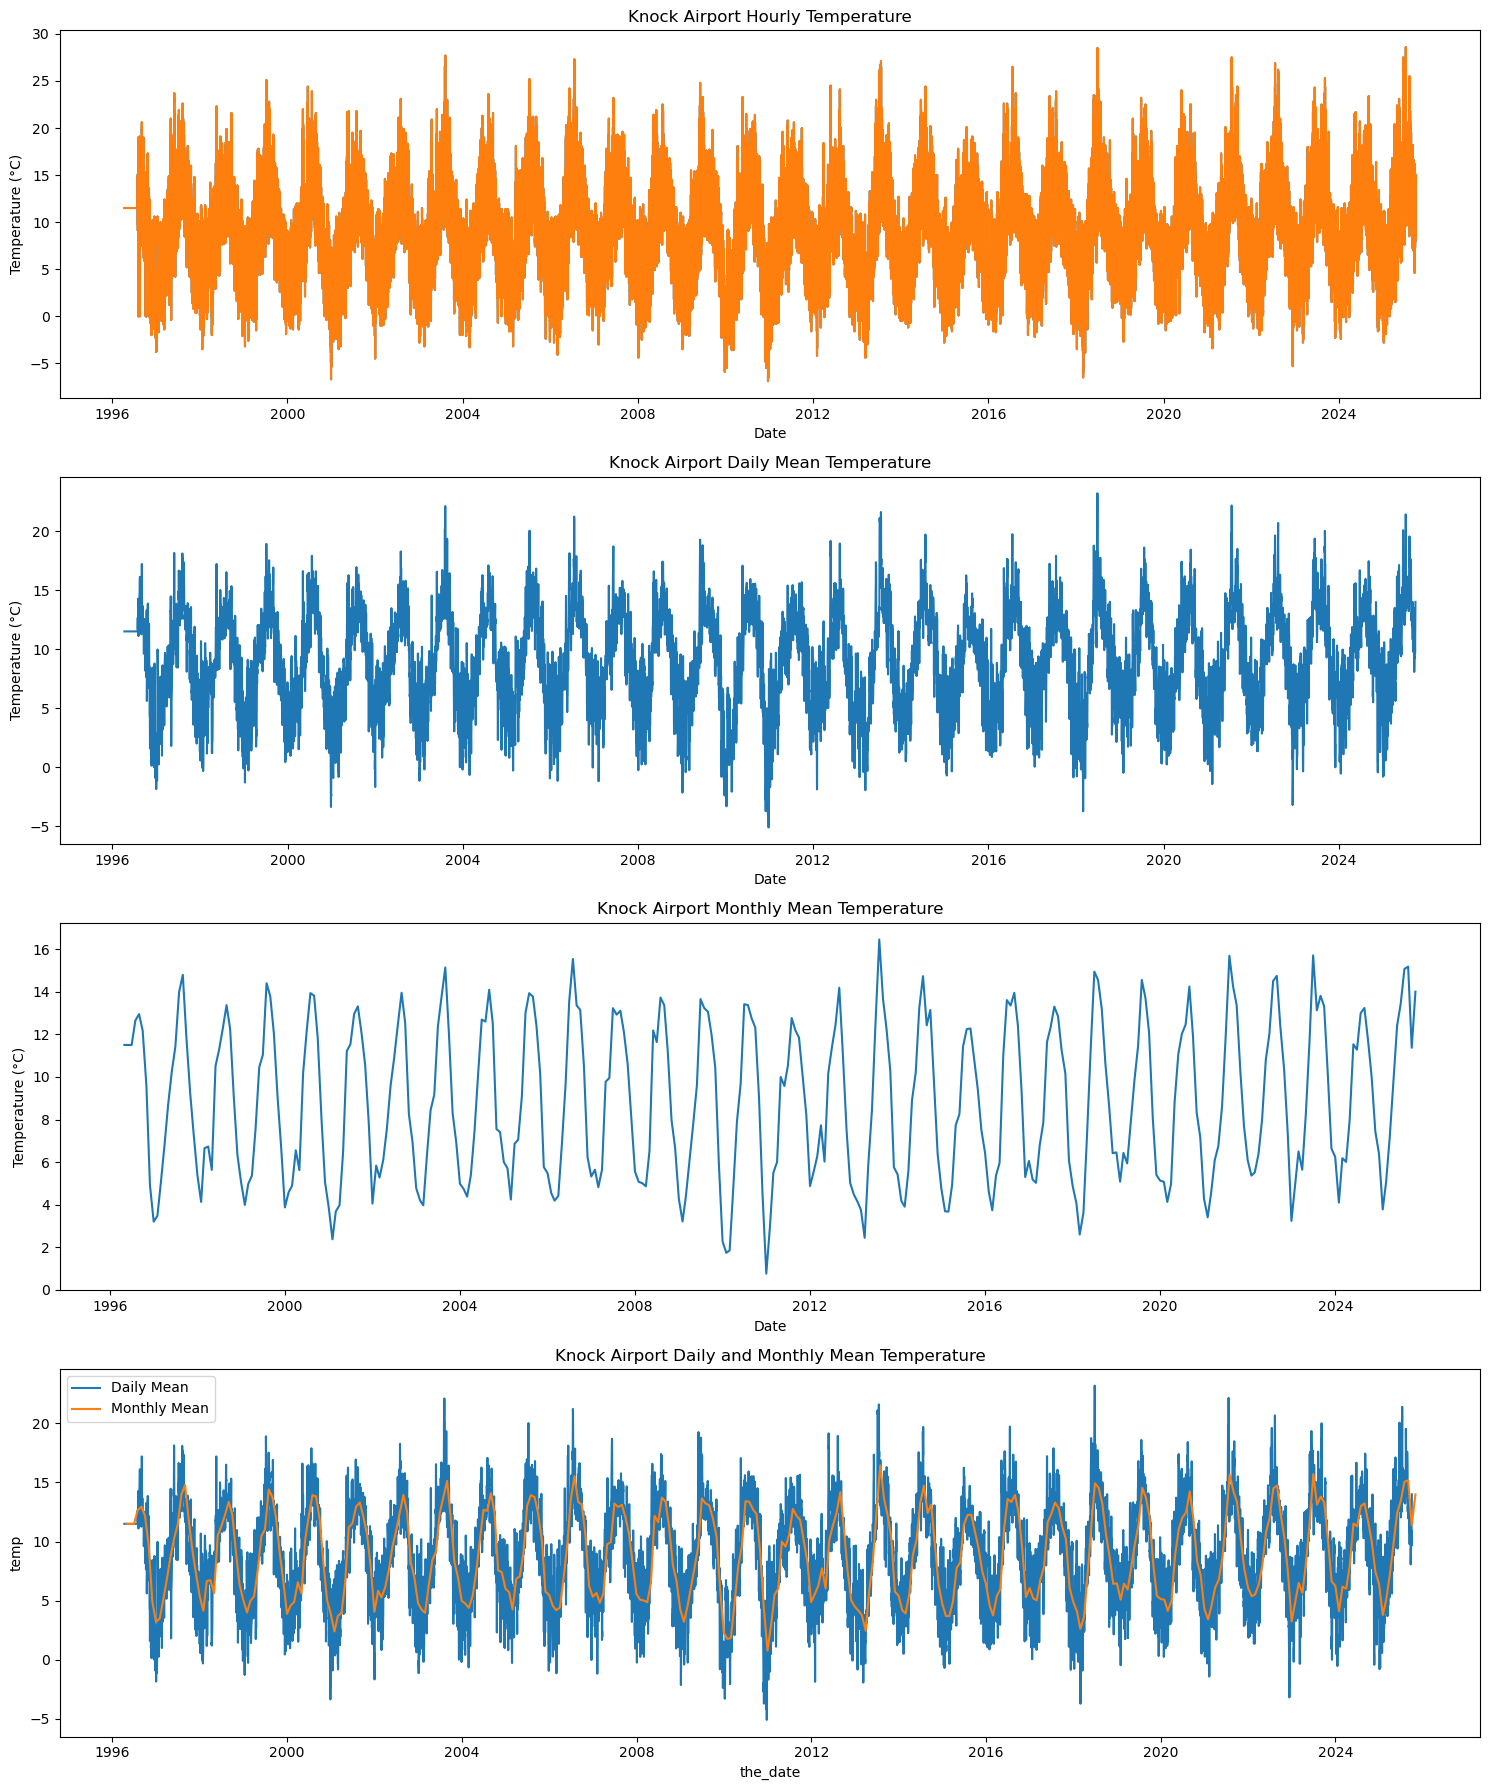

In [51]:
fig, ax = plt.subplots(4,1, figsize=(15,18))
sns.lineplot(data=raw_data, x=raw_data.index, y='temp', ax=ax[0])
ax[0].set_title('Knock Airport Hourly Temperature')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Temperature (°C)')
sns.lineplot(data=raw_data, x=raw_data.index, y='temp', ax=ax[0])
ax[1].set_title('Knock Airport Daily Mean Temperature')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Temperature (°C)')
sns.lineplot(data=rs_mean_daily, x=rs_mean_daily['the_date'], y=rs_mean_daily['temp'], ax=ax[1])
ax[2].set_title('Knock Airport Monthly Mean Temperature')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Temperature (°C)')
sns.lineplot(data=rs_mean_monthly, x=rs_mean_monthly['the_date'], y=rs_mean_monthly['temp'], ax=ax[2])
# combined plot
sns.lineplot(data=rs_mean_daily, x=rs_mean_daily['the_date'], y=rs_mean_daily['temp'], ax=ax[3], label='Daily Mean')
sns.lineplot(data=rs_mean_monthly, x=rs_mean_monthly['the_date'], y=rs_mean_monthly['temp'], ax=ax[3], label='Monthly Mean')
ax[3].set_title('Knock Airport Daily and Monthly Mean Temperature') 
plt.tight_layout()
plt.show()

### Part 3 : Knock Airport - Windspead

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255690 entries, 1996-04-10 14:00:00 to 2025-10-01 00:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   windspeed  255690 non-null  object
dtypes: object(1)
memory usage: 3.9+ MB
None
Missing Values in Windspeed: 0


TypeError: 'value' must be an instance of str or bytes, not a int

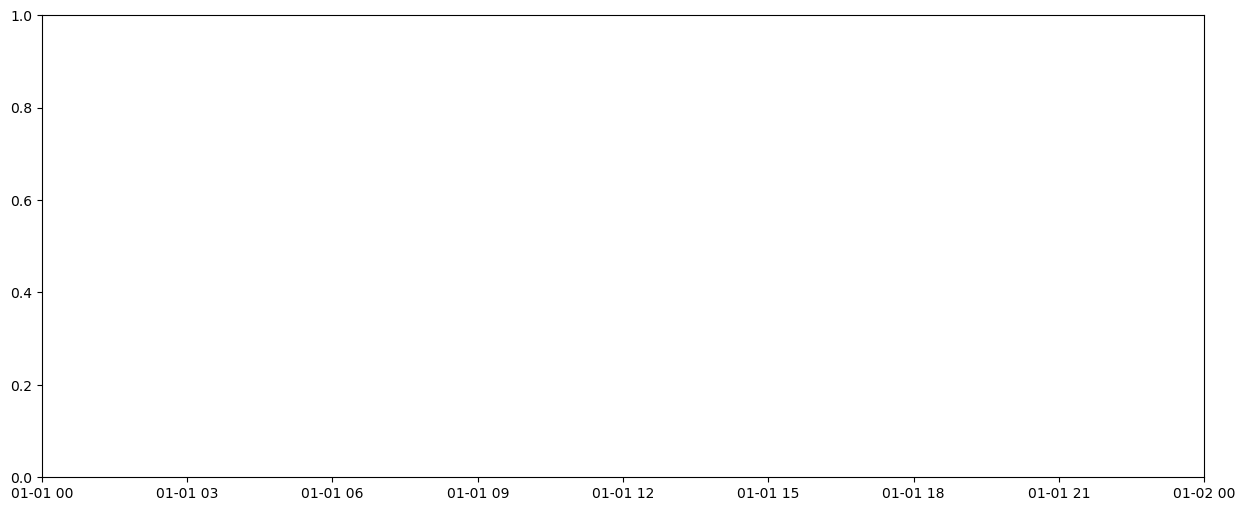

In [ ]:
df_wind = raw_data[['wdsp']].copy()
df_wind.rename(columns={'wdsp': 'windspeed'}, inplace=True)

# find missing values or gaps in windspeed
print(df_wind.info())
df_missing = df_wind.isnull().sum()
# find gaps
print(f"Missing Values in Windspeed: {df_missing['windspeed']}")
# plot windspeed
plt.figure(figsize=(15,6))
sns.lineplot(data=df_wind, x=df_wind.index, y='windspeed')
plt.title('Knock Airport Hourly Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.show()